**Support Vector Machines**

Creating fake income age cluster like K means clustering.

In [0]:
import numpy as np

#creating fake clusters of income/age for N people of k clusters
def createClusters(N,k):
  np.random.seed(1234)
  pointsPerCluster = float(N)/k #how many points to be distributed between the cluster
  X=[] #feature data having incomes and ages randomly generated
  y=[] #lables that these clusters are associated with
  for i in range(k):
    incomeCentroid = np.random.uniform(20000.0,200000.0)
    ageCentroid = np.random.uniform(20.0,70.0)
    for j in range(int(pointsPerCluster)):
      X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
      y.append(i)
  X=np.array(X)
  y=np.array(y)
  return X, y

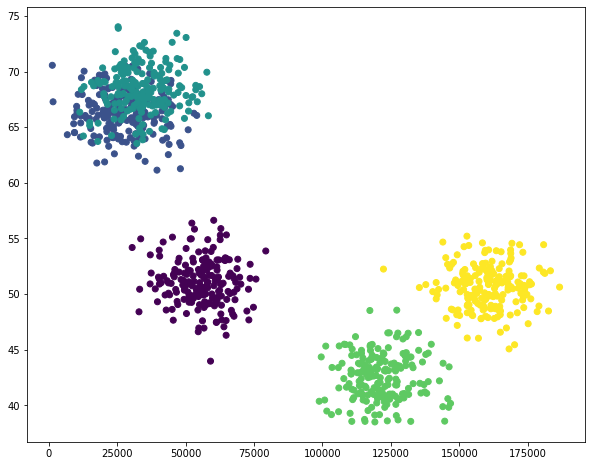

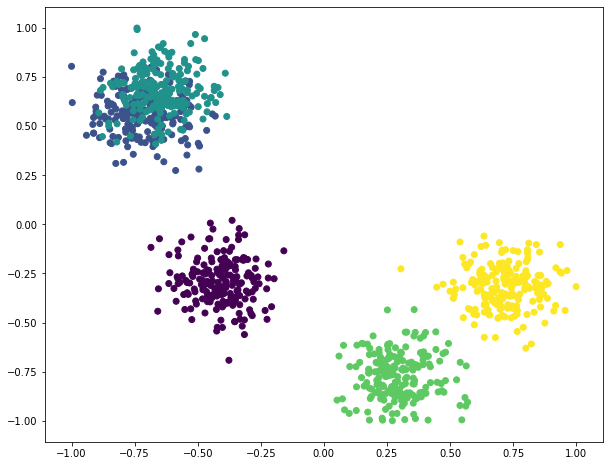

In [14]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X,y)=createClusters(1000,5)

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c=y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X) #for svc to work we have to scale to -1 to 1 using MinMaxScaler
X = scaling.transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c=y.astype(np.float))
plt.show()

In [0]:
from sklearn import svm, datasets

C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y) #linear kernel using fit of the 2D array with all incomes and ages and the clusters assigned to

Setting up a mesh of points in the grid and classify them. we can render them in distinctive colors.

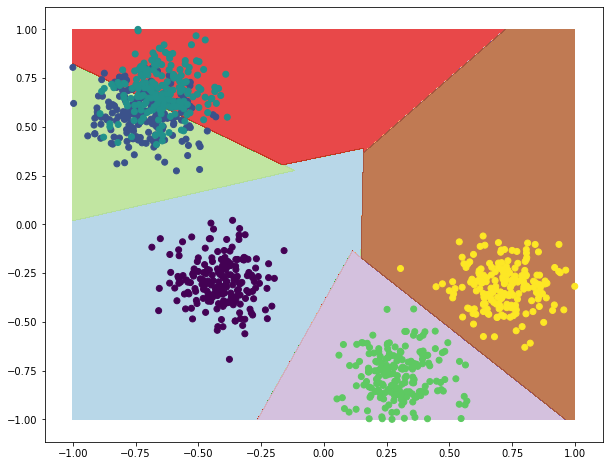

In [16]:
def plotPredictions(clf):
  xx, yy = np.meshgrid(np.arange(-1,1,0.001),np.arange(-1,1,0.001)) #Create a dense grid of points to sample using meshgrid having sample points of -1 to 1 in x and y axis.

  npx = xx.ravel()
  npy = yy.ravel() #converting them to np arrays

  samplePoints = np.c_[npx,npy] #concatinating income and age into comma separated list 

  Z=clf.predict(samplePoints) #generate predicted labels

  plt.figure(figsize=(10,8))
  Z=Z.reshape(xx.shape) #reshaping the result to match xx dimension
  plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.8)#plot predicted labels with the contour
  plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
  plt.show()

plotPredictions(svc)

In [17]:
print(svc.predict([[200000,50]]))

[4]
